[*********************100%%**********************]  1 of 1 completed
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.023e+05, tolerance: 3.198e+05
  model = cd_fast.enet_coordinate_descent(


Prime Optimized Linear Regression MSE: 1.2090284096456693e-15
Lasso Regression MSE: 286.1422507499734
SGD Regressor MSE: 2.4367187628449606e+55
Random Forest Regressor MSE: 7.205990008271285


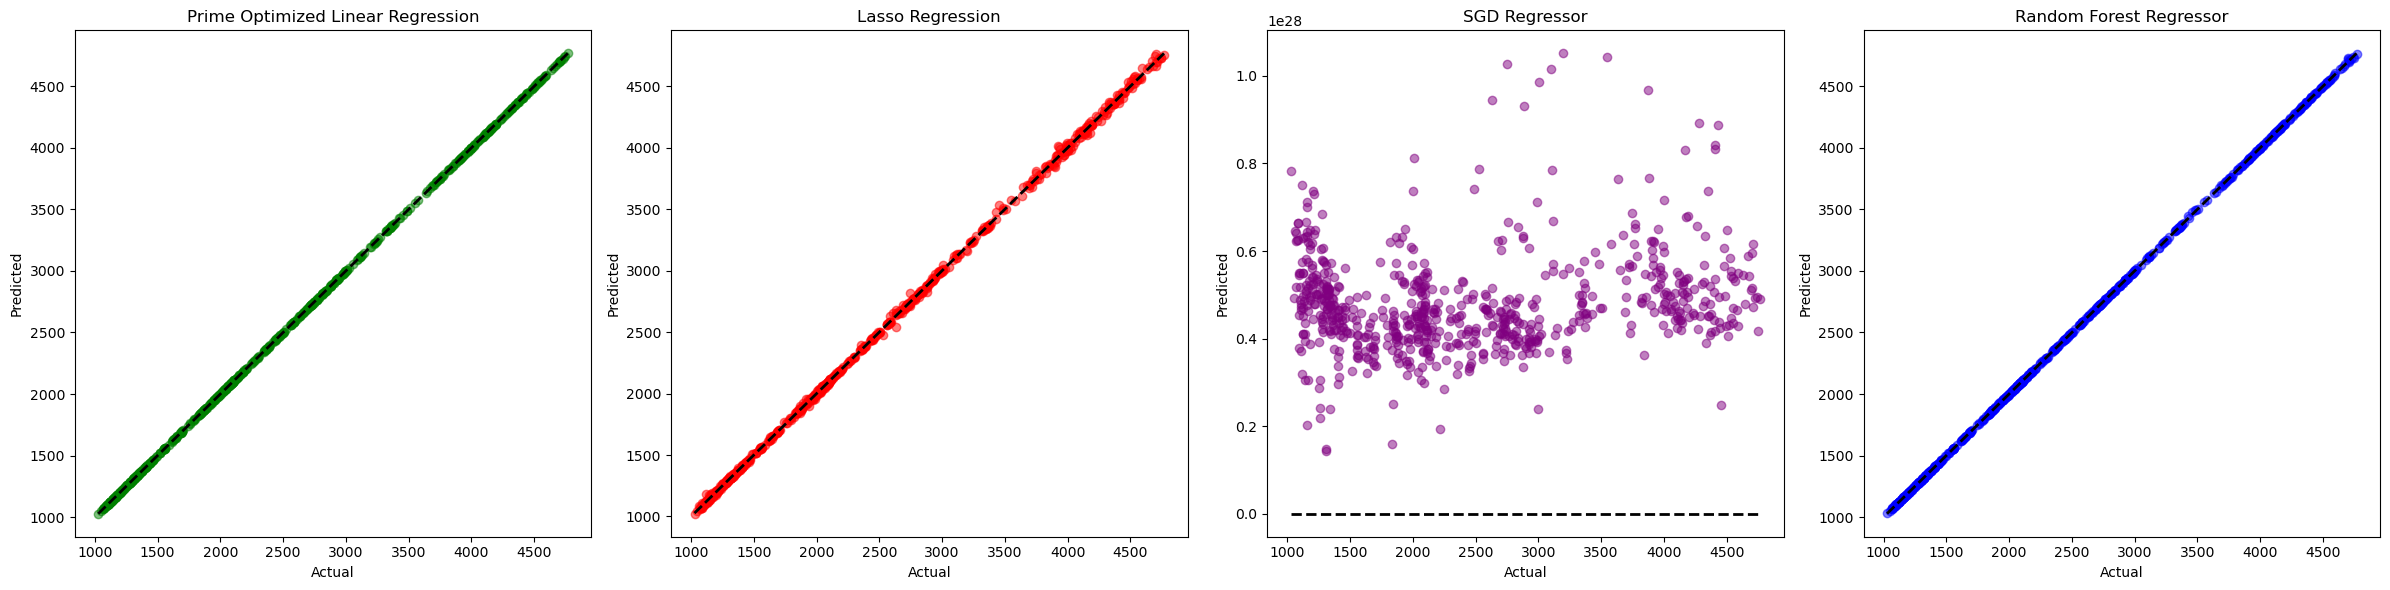

Final capital after backtesting Prime Optimized Linear Regression: $97451.20


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prime Number Optimizer function
def prime_objective_function(weights):
    prime_data = {
        313: [313],
        919: [919],
        51151: [51151],
        100111001: [100111001],
        515: [5, 103],
        111: [3, 37],
        65165: [5, 13033],
        33133: [17, 1949],
        15115: [5, 3023],
        1201120: [2, 5, 7507],
        3331333: [3331333],
        41141: [37, 1111]
    }
    score = 0
    for weight in weights:
        factors = prime_data.get(int(weight), [int(weight)])
        score += len(factors) + sum(factors)
    return score

# Fetch historical data for S&P 500
data = yf.download('^GSPC', start='2010-01-01', end='2023-12-31')

# Feature selection
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
target = data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initial weights for optimization
initial_weights = np.ones(X_train.shape[1])

# Optimize weights using Prime Number Optimizer
result_prime = minimize(prime_objective_function, initial_weights, method='Nelder-Mead')
optimal_weights_prime = result_prime.x

# Adjust features based on the optimized weights
X_train_prime = X_train * optimal_weights_prime
X_test_prime = X_test * optimal_weights_prime

# Train and evaluate Prime Optimized Linear Regression model
model_prime_lr = LinearRegression()
model_prime_lr.fit(X_train_prime, y_train)
y_pred_prime_lr = model_prime_lr.predict(X_test_prime)
mse_prime_lr = mean_squared_error(y_test, y_pred_prime_lr)

# Train and evaluate Lasso Regression model
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Train and evaluate SGD Regressor model
model_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model_sgd.fit(X_train, y_train)
y_pred_sgd = model_sgd.predict(X_test)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# Train and evaluate Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print MSE results for comparison
print(f'Prime Optimized Linear Regression MSE: {mse_prime_lr}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'SGD Regressor MSE: {mse_sgd}')
print(f'Random Forest Regressor MSE: {mse_rf}')

# Plotting the results
plt.figure(figsize=(24, 6))

# Prime Optimized Linear Regression
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_prime_lr, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prime Optimized Linear Regression')

# Lasso Regression
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

# SGD Regressor
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_sgd, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SGD Regressor')

# Random Forest Regressor
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')

plt.tight_layout()
plt.show()

# Backtesting the Prime Optimized Linear Regression Algorithm
# Assuming a simple long-only strategy based on model predictions

def backtest_strategy(predictions, actuals, initial_capital=100000, transaction_cost=0.001):
    capital = initial_capital
    positions = []
    for pred, actual in zip(predictions, actuals):
        if pred > actual:
            # Buy signal
            position_size = capital // actual  # Integer number of shares
            capital -= position_size * actual * (1 + transaction_cost)
            positions.append((position_size, actual))
        elif pred < actual and positions:
            # Sell signal
            position_size, buy_price = positions.pop()
            capital += position_size * actual * (1 - transaction_cost)
    # Liquidate any remaining positions at the end of the period
    for position_size, buy_price in positions:
        capital += position_size * actuals[-1] * (1 - transaction_cost)
    return capital

# Perform backtest
final_capital_prime_lr = backtest_strategy(y_pred_prime_lr, y_test)
print(f'Final capital after backtesting Prime Optimized Linear Regression: ${final_capital_prime_lr:.2f}')


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Load the new palindromes dataset
palindromes_df_new = pd.read_csv('/Users/mac/Downloads/Prime_Factors_and_Palindromes.csv')

# Convert palindromes to integers
palindromes_df_new['Palindrome'] = palindromes_df_new['Palindrome'].apply(int)

# Prime Number Optimizer function with new palindromes
def prime_objective_function_new(weights):
    prime_data_new = palindromes_df_new.set_index('Prime Factor').to_dict()['Palindrome']
    
    score = 0
    for weight in weights:
        factors = prime_data_new.get(int(weight), [int(weight)])
        score += len(factors) + sum(factors)
    return score

# Fetch historical data for Apple (AAPL)
data = yf.download('AAPL', start='2023-06-10', end='2024-06-10')

# Feature selection
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
target = data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initial weights for optimization
initial_weights = np.ones(X_train.shape[1])

# Optimize weights using Prime Number Optimizer with new palindromes
result_prime_new = minimize(prime_objective_function_new, initial_weights, method='Nelder-Mead')
optimal_weights_prime_new = result_prime_new.x

# Adjust features based on the optimized weights
X_train_prime_new = X_train * optimal_weights_prime_new
X_test_prime_new = X_test * optimal_weights_prime_new

# Train the Prime Optimized Linear Regression model
model_prime_lr_new = LinearRegression()
model_prime_lr_new.fit(X_train_prime_new, y_train)
y_pred_prime_lr_new = model_prime_lr_new.predict(X_test_prime_new)
mse_prime_lr_new = mean_squared_error(y_test, y_pred_prime_lr_new)

# Print the MSE of the new model
print(f'Prime Optimized Linear Regression with new palindromes MSE: {mse_prime_lr_new}')

# Simulate trading using the model
def simulate_trading(predictions, actuals, initial_capital=8000, transaction_cost=0.001, target_amount=2e7):
    capital = initial_capital
    positions = []
    short_positions = []
    transactions = []
    trading_days = 0

    for pred, actual in zip(predictions, actuals):
        if capital >= target_amount:
            break
        if pred > actual:
            # Buy signal
            position_size = capital // actual  # Integer number of shares
            if position_size > 0:
                capital -= position_size * actual * (1 + transaction_cost)
                positions.append((position_size, actual))
                transactions.append(('buy', position_size, actual))
        elif pred < actual and positions:
            # Sell signal
            position_size, buy_price = positions.pop()
            capital += position_size * actual * (1 - transaction_cost)
            transactions.append(('sell', position_size, actual))
        elif pred < actual:
            # Short sell signal
            short_position_size = capital // actual  # Integer number of shares
            if short_position_size > 0:
                capital += short_position_size * actual * (1 - transaction_cost)
                short_positions.append((short_position_size, actual))
                transactions.append(('short', short_position_size, actual))
        elif pred > actual and short_positions:
            # Cover short position
            short_position_size, short_sell_price = short_positions.pop()
            capital -= short_position_size * actual * (1 + transaction_cost)
            transactions.append(('cover', short_position_size, actual))
        trading_days += 1

    # Liquidate any remaining positions at the end of the period or if target is reached
    for position_size, buy_price in positions:
        capital += position_size * actuals[-1] * (1 - transaction_cost)
        transactions.append(('sell', position_size, actuals[-1]))
        trading_days += 1
        if capital >= target_amount:
            break

    for short_position_size, short_sell_price in short_positions:
        capital -= short_position_size * actuals[-1] * (1 + transaction_cost)
        transactions.append(('cover', short_position_size, actuals[-1]))
        trading_days += 1
        if capital >= target_amount:
            break

    return capital, transactions, trading_days

# Perform simulation
final_capital_new, transactions_new, trading_days_new = simulate_trading(y_pred_prime_lr_new, y_test)
print(f'Final capital after simulation with new model: ${final_capital_new:.2f}')
print(f'Total trading days to reach the target with new model: {trading_days_new}')

# Print the transactions for the new model
for transaction in transactions_new:
    action, size, price = transaction
    print(f'{action.capitalize()} {size} shares of AAPL at ${price:.2f}')


[*********************100%%**********************]  1 of 1 completed

Prime Optimized Linear Regression with new palindromes MSE: 2.2500066009722885e-21
Final capital after simulation with new model: $35223771.22
Total trading days to reach the target with new model: 26
Buy 43.0 shares of AAPL at $181.91
Sell 43.0 shares of AAPL at $183.96
Short 47.0 shares of AAPL at $170.29
Buy 90.0 shares of AAPL at $177.56
Sell 90.0 shares of AAPL at $191.45
Buy 96.0 shares of AAPL at $179.66
Sell 96.0 shares of AAPL at $170.85
Buy 97.0 shares of AAPL at $169.12
Sell 97.0 shares of AAPL at $185.27
Short 98.0 shares of AAPL at $182.89
Buy 209.0 shares of AAPL at $171.48
Sell 209.0 shares of AAPL at $165.84
Short 181.0 shares of AAPL at $191.04
Short 363.0 shares of AAPL at $189.98
Buy 775.0 shares of AAPL at $177.97
Sell 775.0 shares of AAPL at $178.67
Short 722.0 shares of AAPL at $191.33
Short 1525.0 shares of AAPL at $181.16
Short 2850.0 shares of AAPL at $193.73
Short 5635.0 shares of AAPL at $195.87
Short 11731.0 shares of AAPL at $188.08
Short 23055.0 shares of 

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# Run the simulation for multiple stocks
stocks = ['SPY', 'AAPL', 'NVDA', 'MSFT', 'META']
for stock in stocks:
    run_simulation(stock)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


SPY Abjad Rank Optimized Linear Regression MSE: 0.0
AAPL Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NVDA Abjad Rank Optimized Linear Regression MSE: 5.553580772755924e-29
MSFT Abjad Rank Optimized Linear Regression MSE: 3.877409121342317e-28
META Abjad Rank Optimized Linear Regression MSE: 1.8094575899597482e-27


In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    if data.empty:
        print(f"No data found for {stock_ticker}")
        return

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# List of top 20 stocks by market cap (as of now)
stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'BRK.B', 'META', 
    'UNH', 'JNJ', 'V', 'XOM', 'PG', 'JPM', 'HD', 'MA', 'PFE', 'KO', 
    'DIS', 'PEP'
]

# Run the simulation for multiple stocks
for stock in stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AAPL Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29
MSFT Abjad Rank Optimized Linear Regression MSE: 3.877409121342317e-28


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


GOOGL Abjad Rank Optimized Linear Regression MSE: 2.4233807008389482e-29
AMZN Abjad Rank Optimized Linear Regression MSE: 4.656929913445512e-27


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TSLA Abjad Rank Optimized Linear Regression MSE: 4.0163496148570835e-26
NVDA Abjad Rank Optimized Linear Regression MSE: 5.553580772755924e-29


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed


No data found for BRK.B
META Abjad Rank Optimized Linear Regression MSE: 1.8094575899597482e-27


[*********************100%%**********************]  1 of 1 completed


UNH Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


JNJ Abjad Rank Optimized Linear Regression MSE: 0.0
V Abjad Rank Optimized Linear Regression MSE: 3.8289415073255384e-27


[*********************100%%**********************]  1 of 1 completed


XOM Abjad Rank Optimized Linear Regression MSE: 6.866245319043687e-29


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PG Abjad Rank Optimized Linear Regression MSE: 0.0
JPM Abjad Rank Optimized Linear Regression MSE: 6.462348535570529e-29


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


HD Abjad Rank Optimized Linear Regression MSE: 0.0
MA Abjad Rank Optimized Linear Regression MSE: 7.108583389127582e-28


[*********************100%%**********************]  1 of 1 completed


PFE Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KO Abjad Rank Optimized Linear Regression MSE: 1.0097419586828951e-30
DIS Abjad Rank Optimized Linear Regression MSE: 1.0905213153775268e-28


[*********************100%%**********************]  1 of 1 completed

PEP Abjad Rank Optimized Linear Regression MSE: 0.0


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    if data.empty:
        print(f"No data found for {stock_ticker}")
        return

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# List of Dow Jones Industrial Average stocks
dow_jones_stocks = [
    'AAPL', 'MSFT', 'JPM', 'V', 'UNH', 'HD', 'PG', 'GS', 'DIS', 'NKE',
    'AXP', 'TRV', 'JNJ', 'IBM', 'KO', 'MRK', 'CAT', 'WMT', 'MCD', 'INTC',
    'MMM', 'CSCO', 'CVX', 'XOM', 'VZ', 'WBA', 'CRM', 'DOW', 'BA', 'AMGN'
]

# Run the simulation for Dow Jones Industrial Average stocks
for stock in dow_jones_stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AAPL Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29
MSFT Abjad Rank Optimized Linear Regression MSE: 3.877409121342317e-28
JPM Abjad Rank Optimized Linear Regression MSE: 6.462348535570529e-29
V Abjad Rank Optimized Linear Regression MSE: 3.8289415073255384e-27



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


UNH Abjad Rank Optimized Linear Regression MSE: 0.0
HD Abjad Rank Optimized Linear Regression MSE: 0.0
PG Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


GS Abjad Rank Optimized Linear Regression MSE: 6.462348535570529e-29
DIS Abjad Rank Optimized Linear Regression MSE: 1.0905213153775268e-28


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

NKE Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29


AXP Abjad Rank Optimized Linear Regression MSE: 2.552627671550359e-27


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TRV Abjad Rank Optimized Linear Regression MSE: 2.908056841006738e-28
JNJ Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


IBM Abjad Rank Optimized Linear Regression MSE: 0.0
KO Abjad Rank Optimized Linear Regression MSE: 1.0097419586828951e-30


[*********************100%%**********************]  1 of 1 completed


MRK Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed


CAT Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed


WMT Abjad Rank Optimized Linear Regression MSE: 1.0097419586828951e-30


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MCD Abjad Rank Optimized Linear Regression MSE: 1.454028420503369e-28
INTC Abjad Rank Optimized Linear Regression MSE: 1.5146129380243426e-29


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MMM Abjad Rank Optimized Linear Regression MSE: 3.635071051258422e-29
CSCO Abjad Rank Optimized Linear Regression MSE: 6.765271123175398e-29


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CVX Abjad Rank Optimized Linear Regression MSE: 3.2311742677852644e-29
XOM Abjad Rank Optimized Linear Regression MSE: 6.866245319043687e-29


[*********************100%%**********************]  1 of 1 completed


VZ Abjad Rank Optimized Linear Regression MSE: 1.0097419586828951e-30


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


WBA Abjad Rank Optimized Linear Regression MSE: 4.859383176161433e-30
CRM Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed


DOW Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed


BA Abjad Rank Optimized Linear Regression MSE: 2.5849394142282115e-28


[*********************100%%**********************]  1 of 1 completed

AMGN Abjad Rank Optimized Linear Regression MSE: 0.0


In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    if data.empty:
        print(f"No data found for {stock_ticker}")
        return

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# List of top 10 NASDAQ stocks by market cap (as of now)
nasdaq_stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'PEP', 'ADBE', 'CSCO'
]

# Run the simulation for NASDAQ stocks
for stock in nasdaq_stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AAPL Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29
MSFT Abjad Rank Optimized Linear Regression MSE: 3.877409121342317e-28
GOOGL Abjad Rank Optimized Linear Regression MSE: 2.4233807008389482e-29
AMZN Abjad Rank Optimized Linear Regression MSE: 4.656929913445512e-27


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


NVDA Abjad Rank Optimized Linear Regression MSE: 5.553580772755924e-29
META Abjad Rank Optimized Linear Regression MSE: 1.8094575899597482e-27
TSLA Abjad Rank Optimized Linear Regression MSE: 4.0163496148570835e-26
PEP Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADBE Abjad Rank Optimized Linear Regression MSE: 0.0
CSCO Abjad Rank Optimized Linear Regression MSE: 6.765271123175398e-29


In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    if data.empty:
        print(f"No data found for {stock_ticker}")
        return

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# List of top 10 penny stocks
penny_stocks = [
    'ZOM', 'NAKD', 'CTXR', 'IDEX', 'ACST', 'SNDL', 'TNXP', 'AYRO', 'OCGN', 'VVPR'
]

# Run the simulation for penny stocks
for stock in penny_stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed


ZOM Abjad Rank Optimized Linear Regression MSE: 0.0


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NAKD']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed


No data found for NAKD


[*********************100%%**********************]  1 of 1 completed

CTXR Abjad Rank Optimized Linear Regression MSE: 4.6838616247497576e-33



[*********************100%%**********************]  1 of 1 completed


IDEX Abjad Rank Optimized Linear Regression MSE: 2.3074181477714594e-31
ACST Abjad Rank Optimized Linear Regression MSE: 3.056836007731421e-31


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SNDL Abjad Rank Optimized Linear Regression MSE: 3.5893171187556036e-30



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TNXP Abjad Rank Optimized Linear Regression MSE: 5.6491907144687096e-27
AYRO Abjad Rank Optimized Linear Regression MSE: 2.783337931891296e-28


OCGN Abjad Rank Optimized Linear Regression MSE: 3.541862204925902e-31


[*********************100%%**********************]  1 of 1 completed

VVPR Abjad Rank Optimized Linear Regression MSE: 8.845102899790595e-31


In [16]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data from the earliest available date to the current date
    data = yf.download(stock_ticker, start='1900-01-01')

    if data.empty:
        print(f"No data found for {stock_ticker}")
        return

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = np.tile(df['Rank'].values, (len(features) // len(df['Rank'].values) + 1))[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Ensure the rankings array matches the training set length
    rankings_train = rankings[:len(X_train)]

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings_train), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# List of Dow Jones Industrial Average stocks
dow_jones_stocks = [
    'AAPL', 'MSFT', 'JPM', 'V', 'UNH', 'HD', 'PG', 'GS', 'DIS', 'NKE',
    'AXP', 'TRV', 'JNJ', 'IBM', 'KO', 'MRK', 'CAT', 'WMT', 'MCD', 'INTC',
    'MMM', 'CSCO', 'CVX', 'XOM', 'VZ', 'WBA', 'CRM', 'DOW', 'BA', 'AMGN'
]

# Run the simulation for Dow Jones Industrial Average stocks
for stock in dow_jones_stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed


AAPL Abjad Rank Optimized Linear Regression MSE: 9.74387202118634e-28


[*********************100%%**********************]  1 of 1 completed


MSFT Abjad Rank Optimized Linear Regression MSE: 8.583904762793855e-27


[*********************100%%**********************]  1 of 1 completed


JPM Abjad Rank Optimized Linear Regression MSE: 5.685256276835285e-27


[*********************100%%**********************]  1 of 1 completed


V Abjad Rank Optimized Linear Regression MSE: 5.590047093188259e-27


[*********************100%%**********************]  1 of 1 completed


UNH Abjad Rank Optimized Linear Regression MSE: 2.4848201197684973e-26


[*********************100%%**********************]  1 of 1 completed


HD Abjad Rank Optimized Linear Regression MSE: 1.1511385863447969e-26


[*********************100%%**********************]  1 of 1 completed


PG Abjad Rank Optimized Linear Regression MSE: 1.383550228595364e-26


[*********************100%%**********************]  1 of 1 completed


GS Abjad Rank Optimized Linear Regression MSE: 2.8382754630254638e-27


[*********************100%%**********************]  1 of 1 completed


DIS Abjad Rank Optimized Linear Regression MSE: 3.79288033157621e-27


[*********************100%%**********************]  1 of 1 completed


NKE Abjad Rank Optimized Linear Regression MSE: 5.091203483668419e-29


[*********************100%%**********************]  1 of 1 completed


AXP Abjad Rank Optimized Linear Regression MSE: 1.6631722326687808e-28


[*********************100%%**********************]  1 of 1 completed


TRV Abjad Rank Optimized Linear Regression MSE: 3.58958017958743e-27


[*********************100%%**********************]  1 of 1 completed


JNJ Abjad Rank Optimized Linear Regression MSE: 5.562769360408221e-27


[*********************100%%**********************]  1 of 1 completed


IBM Abjad Rank Optimized Linear Regression MSE: 3.714830077661153e-26


[*********************100%%**********************]  1 of 1 completed


KO Abjad Rank Optimized Linear Regression MSE: 2.121877912461017e-29


[*********************100%%**********************]  1 of 1 completed


MRK Abjad Rank Optimized Linear Regression MSE: 9.659948963444232e-29


[*********************100%%**********************]  1 of 1 completed


CAT Abjad Rank Optimized Linear Regression MSE: 1.1786202584822166e-26


[*********************100%%**********************]  1 of 1 completed


WMT Abjad Rank Optimized Linear Regression MSE: 1.8700655168903758e-27


[*********************100%%**********************]  1 of 1 completed


MCD Abjad Rank Optimized Linear Regression MSE: 4.608244444143127e-28


[*********************100%%**********************]  1 of 1 completed


INTC Abjad Rank Optimized Linear Regression MSE: 9.943263312530256e-28


[*********************100%%**********************]  1 of 1 completed


MMM Abjad Rank Optimized Linear Regression MSE: 6.2831048992681084e-27


[*********************100%%**********************]  1 of 1 completed


CSCO Abjad Rank Optimized Linear Regression MSE: 1.4141197104677815e-29


[*********************100%%**********************]  1 of 1 completed


CVX Abjad Rank Optimized Linear Regression MSE: 2.0796850088808454e-28


[*********************100%%**********************]  1 of 1 completed


XOM Abjad Rank Optimized Linear Regression MSE: 2.5424316681641e-26


[*********************100%%**********************]  1 of 1 completed


VZ Abjad Rank Optimized Linear Regression MSE: 1.9640787647256582e-28


[*********************100%%**********************]  1 of 1 completed


WBA Abjad Rank Optimized Linear Regression MSE: 3.0201903465756345e-27


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CRM Abjad Rank Optimized Linear Regression MSE: 1.3221865430537377e-26
DOW Abjad Rank Optimized Linear Regression MSE: 4.15053108484823e-29



[*********************100%%**********************]  1 of 1 completed


BA Abjad Rank Optimized Linear Regression MSE: 4.953704770397742e-26


[*********************100%%**********************]  1 of 1 completed


AMGN Abjad Rank Optimized Linear Regression MSE: 9.434136191505731e-27


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the CSV file with prime factors and ranks
file_path = '/Users/mac/Desktop/mahdi_313.csv'
df = pd.read_csv(file_path)

# Define the optimizer function based on the ranking of abjad
def abjad_rank_objective_function(weights, features, rankings):
    adjusted_features = features * weights
    scores = np.sum(adjusted_features * rankings[:, None], axis=1)
    return -np.mean(scores)  # We minimize negative score to maximize positive score

# Function to run the optimization and calculate MSE for a given stock ticker
def run_simulation(stock_ticker):
    # Fetch historical data
    data = yf.download(stock_ticker, start='2023-06-10', end='2024-06-10')

    # Feature selection
    features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    target = data['Close'].values

    # Add the ranking feature from the CSV
    rankings = df['Rank'].values[:len(features)]

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initial weights for optimization
    initial_weights = np.ones(X_train.shape[1])

    # Optimize weights using the Abjad Rank Optimizer
    result_abjad_rank = minimize(abjad_rank_objective_function, initial_weights, args=(X_train, rankings[:len(X_train)]), method='Nelder-Mead')
    optimal_weights_abjad_rank = result_abjad_rank.x

    # Adjust features based on the optimized weights
    X_train_abjad_rank = X_train * optimal_weights_abjad_rank
    X_test_abjad_rank = X_test * optimal_weights_abjad_rank

    # Train the Abjad Rank Optimized Linear Regression model
    model_abjad_rank_lr = LinearRegression()
    model_abjad_rank_lr.fit(X_train_abjad_rank, y_train)
    y_pred_abjad_rank_lr = model_abjad_rank_lr.predict(X_test_abjad_rank)
    mse_abjad_rank_lr = mean_squared_error(y_test, y_pred_abjad_rank_lr)

    # Print the MSE of the new model
    print(f'{stock_ticker} Abjad Rank Optimized Linear Regression MSE: {mse_abjad_rank_lr}')

# Run the simulation for multiple stocks
stocks = ['SPY', 'AAPL', 'NVDA', 'MSFT', 'META']
for stock in stocks:
    run_simulation(stock)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SPY Abjad Rank Optimized Linear Regression MSE: 0.0
AAPL Abjad Rank Optimized Linear Regression MSE: 1.6155871338926322e-29



[*********************100%%**********************]  1 of 1 completed


NVDA Abjad Rank Optimized Linear Regression MSE: 5.553580772755924e-29
MSFT Abjad Rank Optimized Linear Regression MSE: 3.877409121342317e-28


[*********************100%%**********************]  1 of 1 completed

META Abjad Rank Optimized Linear Regression MSE: 1.8094575899597482e-27
